In [80]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

%matplotlib inline  


In [81]:
data = pd.read_csv('listings.csv')
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price'],
      dtype='object')

In [82]:
#First 5 rows of the DataFrame:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,288,46,0.39,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365,0,NaN,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,212,274,4.64,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0,9,0.10,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1,127,75,0.60,200


In [83]:
#Number of rows and columns:
data.shape

(48864, 15)

In [84]:
#Index, Datatype and Memory information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 15 columns):
id                                48864 non-null int64
name                              48848 non-null object
host_id                           48864 non-null int64
host_name                         48846 non-null object
neighbourhood_group               48864 non-null object
neighbourhood                     48864 non-null object
latitude                          48864 non-null float64
longitude                         48864 non-null float64
room_type                         48864 non-null object
minimum_nights                    48864 non-null int64
calculated_host_listings_count    48864 non-null int64
availability_365                  48864 non-null int64
number_of_reviews                 48864 non-null int64
reviews_per_month                 38733 non-null float64
price                             48864 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 5

Our data set contains 48864 rows of data. Each row is a specific listing that is available for rent on Airbnb in New york city. The 15 columns describe different attributes (features) of each listing:
- id
- name: Listing title
- host_id and host_name
- neighbourhood_group and neighbourhood
- latitude and longitude
- room_type: Entire home/apt, Private room or Shared room
- minimum_nights: Minimum number of nights a guest can stay for the rental
- calculated_host_listings_count: Number of other listings from the same host
- availability_365: Number of days the listing is avaialble during the year
- number_of_reviews: Number of reviews that previous guests have left
- reviews_per_month : Average number of reviews per month
- price: Price per night for the listing.

In [85]:
#Summary statistics for Numerical columns:
data.describe()

,id,host_id,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
count,4.886400e+04,4.886400e+04,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,38733.000000,48864.000000
mean,1.940851e+07,6.943161e+07,40.728664,-73.951850,7.093116,7.438278,112.483505,23.392191,1.365694,151.453176
std,1.124290e+07,8.058217e+07,0.054794,0.046440,20.264170,34.949053,132.373994,44.939690,1.692891,236.585525
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,9.577635e+06,8.048590e+06,40.689797,-73.982952,1.000000,1.000000,0.000000,1.000000,0.190000,69.000000
50%,1.994839e+07,3.168654e+07,40.722880,-73.955510,2.000000,1.000000,41.000000,5.000000,0.710000,105.000000
75%,2.974014e+07,1.096553e+08,40.762970,-73.935628,5.000000,2.000000,232.000000,24.000000,2.000000,175.000000
max,3.749909e+07,2.830244e+08,40.912400,-73.712990,1250.000000,343.000000,365.000000,639.000000,66.610000,10000.000000


In [86]:
#Summary statistics for Categorical columns:
data.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48848,48846,48864,48864,48864
unique,47894,11407,5,222,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,19,430,21456,3915,25296


### Missing data
We notice some missing values in the reviews_per_month column.

In [87]:
len(data[data['reviews_per_month'].isnull()])

10131

In [88]:
data.loc[data['reviews_per_month'].isnull(),"number_of_reviews"].describe()

count    10131.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: number_of_reviews, dtype: float64

All listings for which reviews_per_month is null, have 0 total number of reviews. This means we can replace the null values with 0.

In [89]:
data.loc[data['reviews_per_month'].isnull(),"reviews_per_month"]=0
#data.info()

#### Market demand analysis

In [108]:
data["neighbourhood_group"].value_counts()

Manhattan        21456
Brooklyn         20114
Queens            5811
Bronx             1105
Staten Island      378
Name: neighbourhood_group, dtype: int64

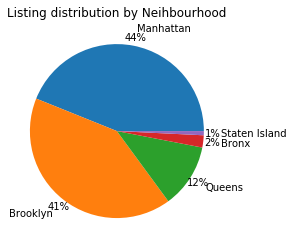

In [117]:
plt.pie(data["neighbourhood_group"].value_counts(),labels=data["neighbourhood_group"].value_counts().keys(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.title("Listing distribution by Neihbourhood")
plt.show()

In [95]:
data['room_type'].value_counts() 

Entire home/apt    25296
Private room       22397
Shared room         1171
Name: room_type, dtype: int64

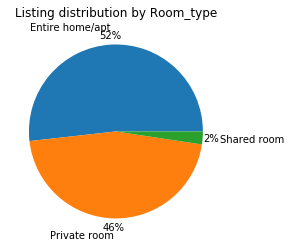

In [118]:
plt.pie(data["room_type"].value_counts(),labels=data["room_type"].value_counts().keys(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.title("Listing distribution by Room_type")
plt.show()

The most popular neighborhood group is Manhattan (44%) followed very closely by Brooklyn(41%). The Most popular Room type is an Entire home/apt (52%) followed by a private room (46%). 
The least popular neighborhood group is Staten island (1%) and room type: shared room(2%).

What is interesting at this point is to see prices for these different categories, as well as combinations of them.

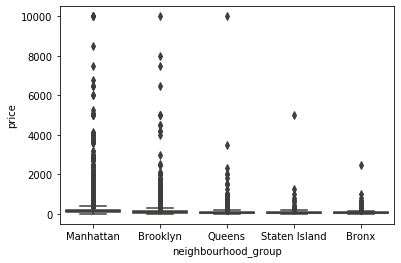

In [139]:
import seaborn as sns
sns.boxplot(x="neighbourhood_group", y="price", data=data);

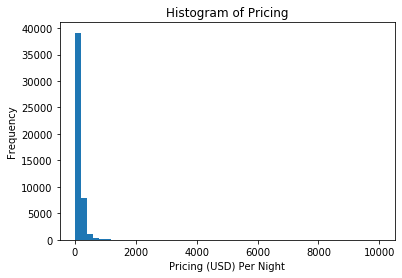

In [92]:
plt.hist(data['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Night")
plt.ylabel("Frequency")
plt.show()

In [158]:
#Outliers
boston_df_o1=data

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1

boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(27266, 15)

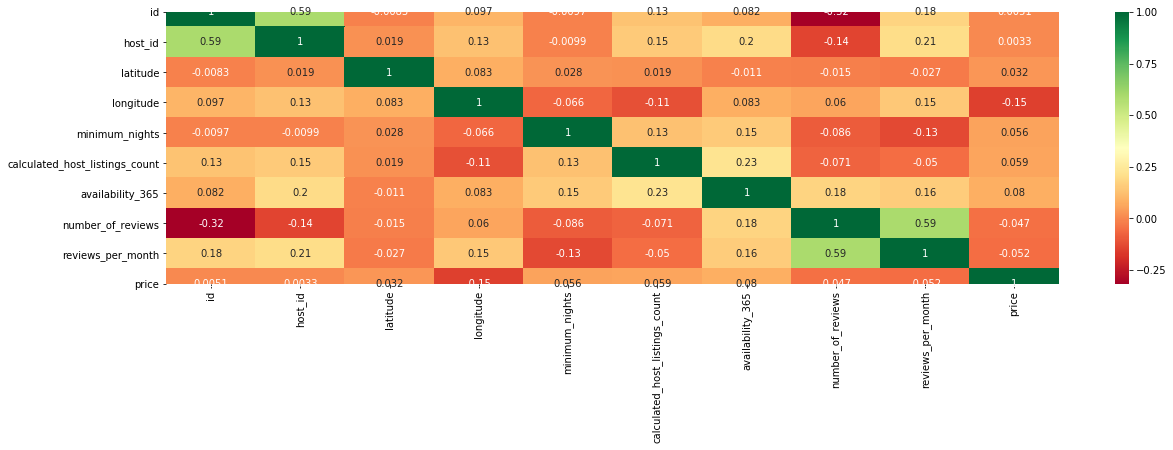

Positive correlation: 
 id  id    1.0
dtype: float64

 Negative correlation: 
 Series([], dtype: float64)


In [166]:
#lET'S FIRST Check if there is any correlation between the variables:
cor=data.corr()
plt.subplots(figsize=(20, 5))
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()

s = cor.unstack()
print("Positive correlation: \n", s[s.values>0.75].drop_duplicates())
print("\n Negative correlation: \n", s[s.values<-0.75].drop_duplicates())

In [119]:
data[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()

,price
neighbourhood_group,
Bronx,87.904072
Brooklyn,124.041663
Manhattan,195.154828
Queens,99.417140
Staten Island,115.198413


In [120]:
data[['room_type','price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,209.486322
Private room,90.116533
Shared room,70.966695


In [121]:
data[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type']).mean()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  126.084656
                    Private room      66.965099
                    Shared room       78.588235
Brooklyn            Entire home/apt  177.641610
                    Private room      76.537953
                    Shared room       48.866029
Manhattan           Entire home/apt  245.705454
                    Private room     118.139705
                    Shared room       90.949045
Queens              Entire home/apt  148.068461
                    Private room      71.703067
                    Shared room       68.294118
Staten Island       Entire home/apt  173.016575
                    Private room      62.385027
                    Shared room       56.300000

Not all of these columns are applicable for predicting listing prices. We will choose to drop these columns:
- id
- host_id and host name
- neighborhood or neighborhood group?
- latitute and longitude?

We see the distribution for pricing is strongly skewed. Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. There are of course listings with a high pricing as well; intuitively this matches with hosts that are listing a high value property such as an entire house. To compensate for the skewed  distribution, we will log the response variable and store the results in a new panda column. We will then run our baseline models on both the logged and original response and compare the results.

In [34]:
from pandas.plotting import scatter_matrix


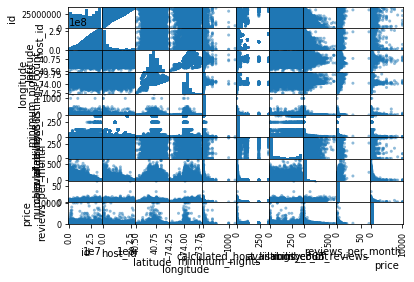

In [36]:
scatter_matrix(data)
plt.show()

## Price: 

Because we found numerous outliers in the dataset, we believed it would be better to take the log of prices so that prices could be plotted on a more normal distribution. This would also allow us to see relationships between variables and price better.



In [ ]:
log_price = data_final.price.apply(math.log)
data_final['log_price'] = log_price


In [ ]:
data_final.to_csv('?.csv')

In [ ]:
#pip install shapely in terminal
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon
#pip install descartes in terminal


In [ ]:

street_map=gpd.read_file("Shapefiles_NYC/geo_export_1808540e-cda0-4eee-93a4-edc445b4204f.shp")
geometry=[Point(x,y) for x,y in zip(data["longitude"],data["latitude"])]

# designate coordinate system
crs = {'init': 'espc:4326'}


In [ ]:

geo_df = gpd.GeoDataFrame(data.head(100),crs = crs,geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental Prices in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()